In [44]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import user, password, host

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import os
directory = os.getcwd()

# Scaling Numeric Data

### Do your work for these exercises in a jupyter notebook named `scaling`. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

#### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [45]:
df = w.prep_zillow(w.get_zillow_data())
df.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county
0,20,4,2.0,3633,222321.0,74104.0,296425,2005,6941.39,LA
1,31,3,4.0,1620,339532.0,508238.0,847770,2011,10244.94,LA
2,33,3,2.0,2077,210192.0,436568.0,646760,1926,7924.68,LA
3,62,0,0.0,1200,595.0,4733.0,5328,1972,91.60,LA
5,99,0,0.0,203,7083.0,7083.0,14166,1960,163.79,LA


In [46]:
# split the data

train, validate_and_test = train_test_split(df, train_size=.60, random_state=123)
validate, test = train_test_split(validate_and_test, test_size=.50, random_state=123)

train.shape, test.shape, validate.shape

((1283062, 10), (427688, 10), (427687, 10))

In [47]:
# 1. create the object
scaler = sklearn.preprocessing.MinMaxScaler()

# 2. fit the object (learn the min and max value)
scaler.fit(train[['bedrooms','bathrooms','sqft','tax_structure','tax_land','yearbuilt','taxamount']])

MinMaxScaler()

In [48]:
train_scaled = scaler.transform(train[['bedrooms','bathrooms','sqft','tax_structure','tax_land','yearbuilt','taxamount']])

array([[1.60000000e-01, 1.50000000e-01, 3.78259404e-03, ...,
        3.53503995e-04, 6.79069767e-01, 1.80411903e-03],
       [1.20000000e-01, 1.00000000e-01, 2.47403115e-03, ...,
        6.40959892e-03, 6.46511628e-01, 5.73175573e-03],
       [1.20000000e-01, 1.50000000e-01, 4.00853296e-03, ...,
        6.04534574e-04, 8.69767442e-01, 3.76726954e-03],
       ...,
       [1.60000000e-01, 1.50000000e-01, 4.40392607e-03, ...,
        3.89566785e-04, 7.81395349e-01, 1.43550366e-03],
       [1.60000000e-01, 1.00000000e-01, 2.64725098e-03, ...,
        3.22872787e-03, 8.00000000e-01, 4.63759696e-03],
       [1.20000000e-01, 1.50000000e-01, 3.39284941e-03, ...,
        2.23218855e-03, 7.39534884e-01, 3.66742616e-03]])

In [49]:
# assign the scaled values as new columns in the train

train[['bedrooms_scaled','bathrooms_scaled','sqft_scaled','tax_structure_scaled','tax_land_scaled','yearbuilt_scaled','taxamount_scaled']] = train_scaled

In [50]:
train.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county,bedrooms_scaled,bathrooms_scaled,sqft_scaled,tax_structure_scaled,tax_land_scaled,yearbuilt_scaled,taxamount_scaled
926160,1289383,4,3.0,2010,97093.0,22343.0,119436,1947,1958.36,LA,0.16,0.150,0.003783,0.001525,0.000354,0.679070,0.001804
1083249,1508166,3,2.0,1315,101222.0,404892.0,506114,1940,6192.70,LA,0.12,0.100,0.002474,0.001590,0.006410,0.646512,0.005732
613062,853501,3,3.0,2130,238800.0,38200.0,277000,1988,4074.81,LA,0.12,0.150,0.004009,0.003751,0.000605,0.869767,0.003767
320744,446343,3,2.5,1893,193557.0,187240.0,380797,2000,4466.86,Ventura,0.12,0.125,0.003562,0.003040,0.002964,0.925581,0.004131
632541,880703,4,2.0,2133,370672.0,370672.0,741344,1964,7822.74,Ventura,0.16,0.100,0.004014,0.005822,0.005868,0.758140,0.007244


In [51]:
# make new scaled columns for validate and test (transform only)
validate[['bedrooms_scaled','bathrooms_scaled','sqft_scaled','tax_structure_scaled','tax_land_scaled','yearbuilt_scaled','taxamount_scaled']] = scaler.transform(validate[['bedrooms','bathrooms','sqft','tax_structure','tax_land','yearbuilt','taxamount']])
test[['bedrooms_scaled','bathrooms_scaled','sqft_scaled','tax_structure_scaled','tax_land_scaled','yearbuilt_scaled','taxamount_scaled']] = scaler.transform(test[['bedrooms','bathrooms','sqft','tax_structure','tax_land','yearbuilt','taxamount']])

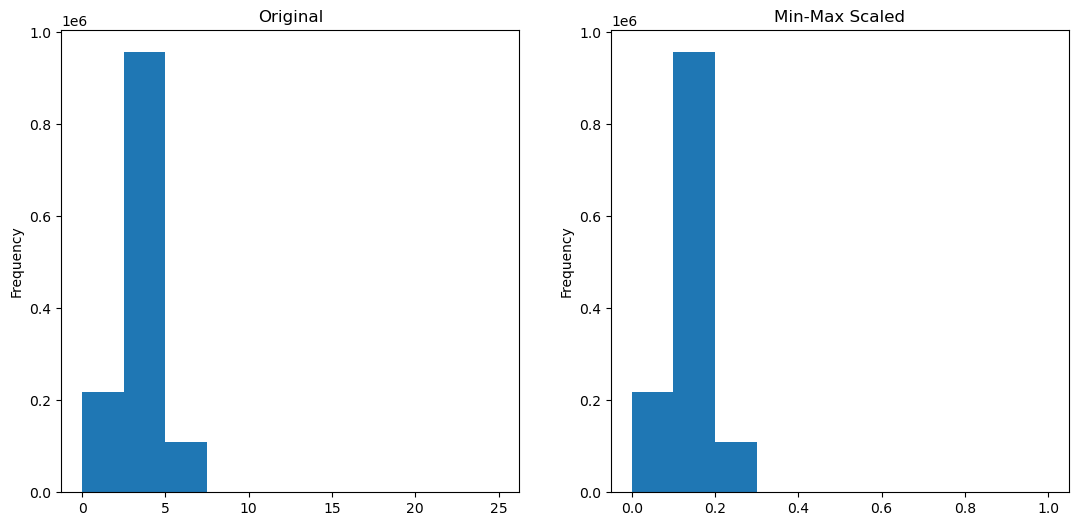

In [52]:
# Visualize the un-scaled and scaled distribution for total_bill

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title='Original')

# #subplot 2
plt.subplot(122)
train.bedrooms_scaled.plot.hist(title='Min-Max Scaled');

#### 2. Apply the `.inverse_transform` method to your scaled data. Is the resulting dataset the exact same as the original data?

In [10]:
# Now let's revert the scaled data back to its original range
original_data = scaler.inverse_transform(train_scaled)

pd.DataFrame(original_data, columns=['bedrooms','bathrooms','yearbuilt','sqft', 'taxamount'])

,bedrooms,bathrooms,yearbuilt,sqft,taxamount
0,4.0,3.0,1947.0,2010.0,1958.36
1,3.0,2.0,1940.0,1315.0,6192.70
2,3.0,3.0,1988.0,2130.0,4074.81
3,3.0,2.5,2000.0,1893.0,4466.86
4,4.0,2.0,1964.0,2133.0,7822.74
...,...,...,...,...,...
1283057,3.0,2.0,1974.0,1973.0,7857.04
1283058,4.0,2.0,1976.0,1650.0,1765.26
1283059,4.0,3.0,1969.0,2340.0,1560.96
1283060,4.0,2.0,1973.0,1407.0,5013.10


#### 3. Read the documentation for sklearn's `QuantileTransformer`. Use `normal` for the `output_distribution` and apply this scaler to your data. Visualize the result of your data scaling.

In [11]:
### sklearn.preprocessing.QuantileTransformer(
### *, n_quantiles=1000, output_distribution='uniform', 
### ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True)
# 1. create the object
scaler2 = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

# 2. fit the object (learn the min and max value)
scaler2.fit(train[['bedrooms','bathrooms','yearbuilt','sqft', 'taxamount']])

QuantileTransformer(output_distribution='normal')

In [12]:
train_scaled2 = scaler2.transform(train[['bedrooms','bathrooms','yearbuilt','sqft', 'taxamount']])

# assign the scaled values as new columns in the train

train[['bedrooms_scaled','bathrooms_scaled','yearbuilt_scaled','sqft_scaled', 'taxamount_scaled']] = train_scaled2

train.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county,bedrooms_scaled,bathrooms_scaled,yearbuilt_scaled,sqft_scaled,taxamount_scaled
926160,1289383,4,3.0,2010,97093.0,22343.0,119436,1947,1958.36,LA,0.721714,0.890172,-0.840906,0.464939,-0.947506
1083249,1508166,3,2.0,1315,101222.0,404892.0,506114,1940,6192.70,LA,-0.270485,-0.176553,-1.061884,-0.573115,0.605183
613062,853501,3,3.0,2130,238800.0,38200.0,277000,1988,4074.81,LA,-0.270485,0.890172,1.102440,0.591696,-0.014610
320744,446343,3,2.5,1893,193557.0,187240.0,380797,2000,4466.86,Ventura,-0.270485,0.472407,1.571286,0.332198,0.115580
632541,880703,4,2.0,2133,370672.0,370672.0,741344,1964,7822.74,Ventura,0.721714,-0.176553,0.256198,0.593940,0.942951


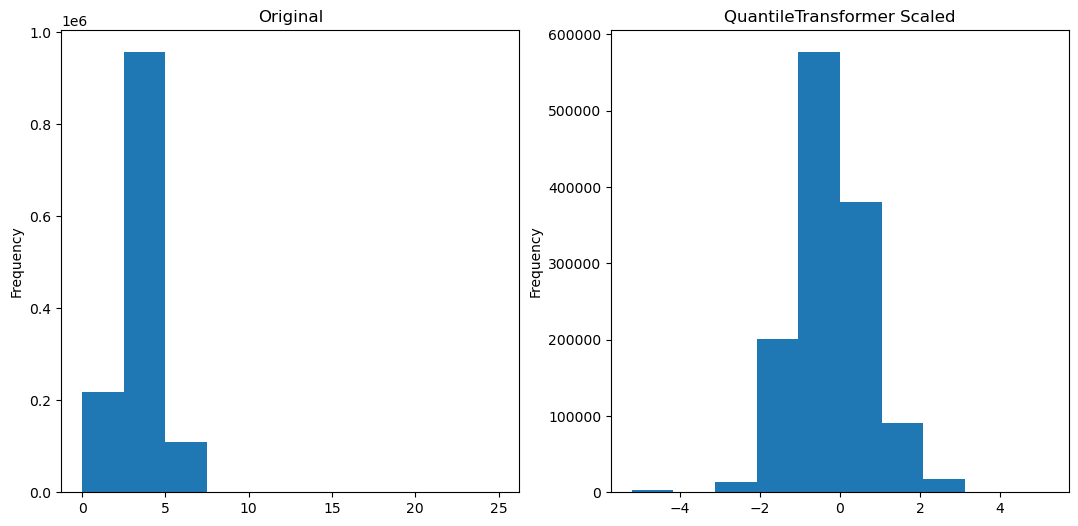

In [13]:
# Visualize the un-scaled and scaled distribution for total_bill

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title='Original', bins= 10)

#subplot 2
plt.subplot(122)
train.bedrooms_scaled.plot.hist(title='QuantileTransformer Scaled', bins= 10);

In [43]:
train.head()

,id,bedrooms,bathrooms,sqft,tax_structure,tax_land,taxvalue,yearbuilt,taxamount,county,bedrooms_structured,bathrooms_structured,sqft_structured,tax_structure_structured,tax_land_structured,yearbuilt_structured,taxamount_structured
926160,1289383,4,3.0,2010,97093.0,22343.0,119436,1947,1958.36,LA,0.16,0.150,0.003783,0.001525,0.000354,0.679070,0.001804
1083249,1508166,3,2.0,1315,101222.0,404892.0,506114,1940,6192.70,LA,0.12,0.100,0.002474,0.001590,0.006410,0.646512,0.005732
613062,853501,3,3.0,2130,238800.0,38200.0,277000,1988,4074.81,LA,0.12,0.150,0.004009,0.003751,0.000605,0.869767,0.003767
320744,446343,3,2.5,1893,193557.0,187240.0,380797,2000,4466.86,Ventura,0.12,0.125,0.003562,0.003040,0.002964,0.925581,0.004131
632541,880703,4,2.0,2133,370672.0,370672.0,741344,1964,7822.74,Ventura,0.16,0.100,0.004014,0.005822,0.005868,0.758140,0.007244


#### 4. Use the `QuantileTransformer`, but omit the `output_distribution` argument. Visualize your results. What do you notice?

In [15]:
### sklearn.preprocessing.QuantileTransformer(
### *, n_quantiles=1000, output_distribution='uniform', 
### ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=True)
# 1. create the object
scaler2 = sklearn.preprocessing.QuantileTransformer()

# 2. fit the object (learn the min and max value)
scaler2.fit(train[['bedrooms','bathrooms','yearbuilt','sqft', 'taxamount']])

QuantileTransformer()

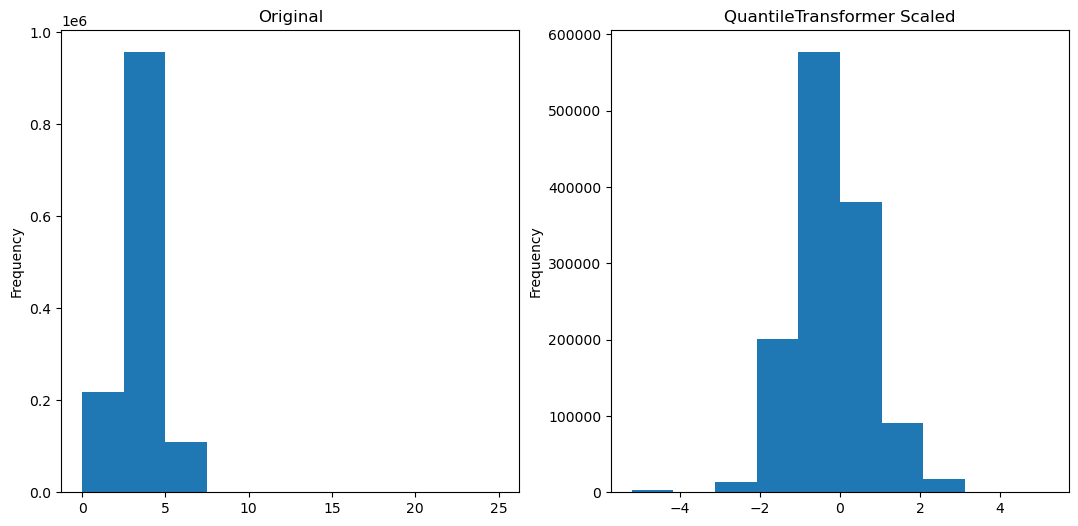

In [16]:
# Visualize the un-scaled and scaled distribution for total_bill

plt.figure(figsize=(13, 6))

# subplot 1
plt.subplot(121)
train.bedrooms.plot.hist(title='Original', bins= 10)

#subplot 2
plt.subplot(122)
train.bedrooms_scaled.plot.hist(title='QuantileTransformer Scaled', bins= 10);

#### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your `prepare.py` that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!